# Breast Cancer prediction
- Goal: to predict breast cancer based on 11 features desribing characteristics of the cell
- Wisconsin Diagnostic Breast Cancer (WDBC): 11 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
- original paper documented 97% accuracy with a multisurface method-tree
- Kumari and Singh (2018) reported KNN yielded the highest accuracy when compared with linear regression & SVM (https://reader.elsevier.com/reader/sd/pii/S1877050918309323?token=BF4DA2D178F34AB13A1E31B04AB8618B8737D4D7B76D92896E0E7F0B449F33949DD479D0DB696B5BD25F60123E9BE4D8)

NB. other reading materials
https://www.hindawi.com/journals/jhe/2019/4253641/#results 
https://iopscience.iop.org/article/10.1088/1757-899X/495/1/012033/pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4452509/ - uses ICA instead of PCA 

NB. NHS currently uses the Cox proportional hazards regression model to predict breast cancer (https://breast.predict.nhs.uk/about/technical/technical)

## Initialisation

In [1]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint

# IMport machine learning & stats libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, confusion_matrix, roc_curve, accuracy_score, precision_score)

# to display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import data
df = pd.read_csv("data.csv")

## Overview of the data

In [4]:
print("Data shape: " + str(df.shape))
df.info()

Data shape: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


### Observations
- class label (y) = diagnosis
- all features seem to be have correct data type 
- no missing/null values

### To do
- the  first (ID which cannot be used for classification) & last column (unnamed: 32) can be removed
- one-hot encode diagnosis for modelling
- potentially linearity/redundancy in features (ex. mean, SEM, worst for the same features) - PCA to reduce dimensionality? 


## Pre-processing

In [7]:
# remove meaningless variables
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

## Data exploration and visualisation

Number of Benign:  357   62.7 %
Number of Malignant:  212   37.3 %


Text(0.5, 1.0, 'Number of Malignant vs Benign Tumours')

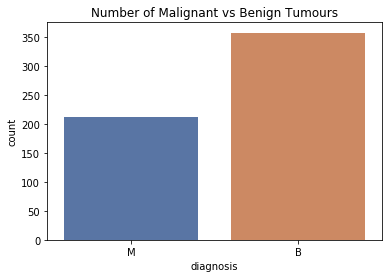

In [8]:
# Benign vs Malignant ratio
B_counts, M_counts = df['diagnosis'].value_counts()
B_percent, M_percent = (df['diagnosis'].value_counts(normalize=True))*100

print('Number of Benign: ', B_counts, ' ', round(B_percent,1), '%')
print('Number of Malignant: ',M_counts, ' ', round(M_percent,1), '%')

ax = sns.countplot(x='diagnosis', data=df, palette='deep')
plt.title('Number of Malignant vs Benign Tumours')

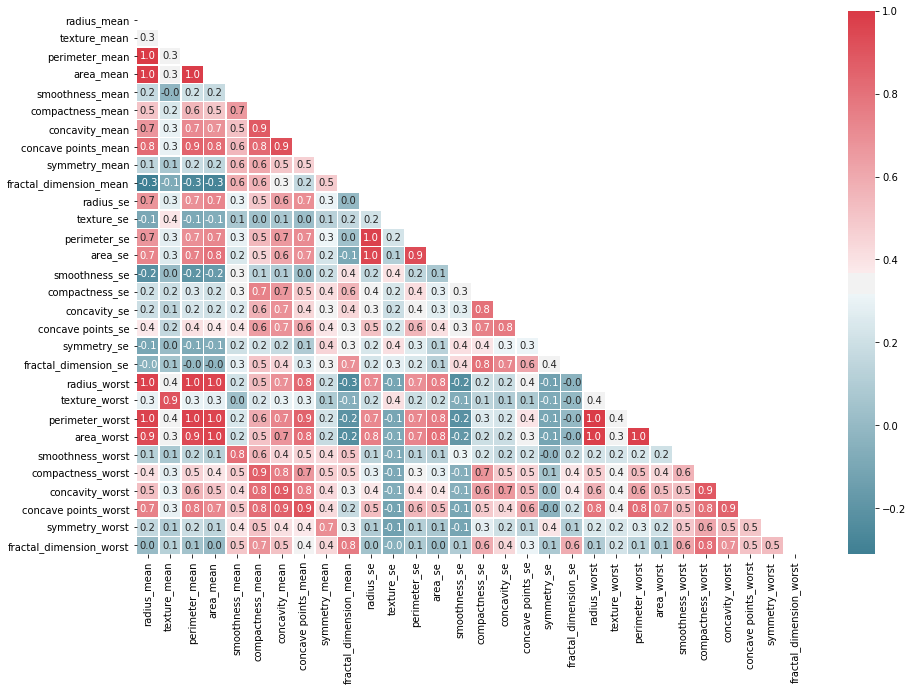

In [9]:
# Build a simpler and less saturated correlation matrix
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#correlation map
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
# Box plot
features_mean = df.columns[1:11] 
features_se = df.columns[11:21]
features_worst = df.columns[21:31]

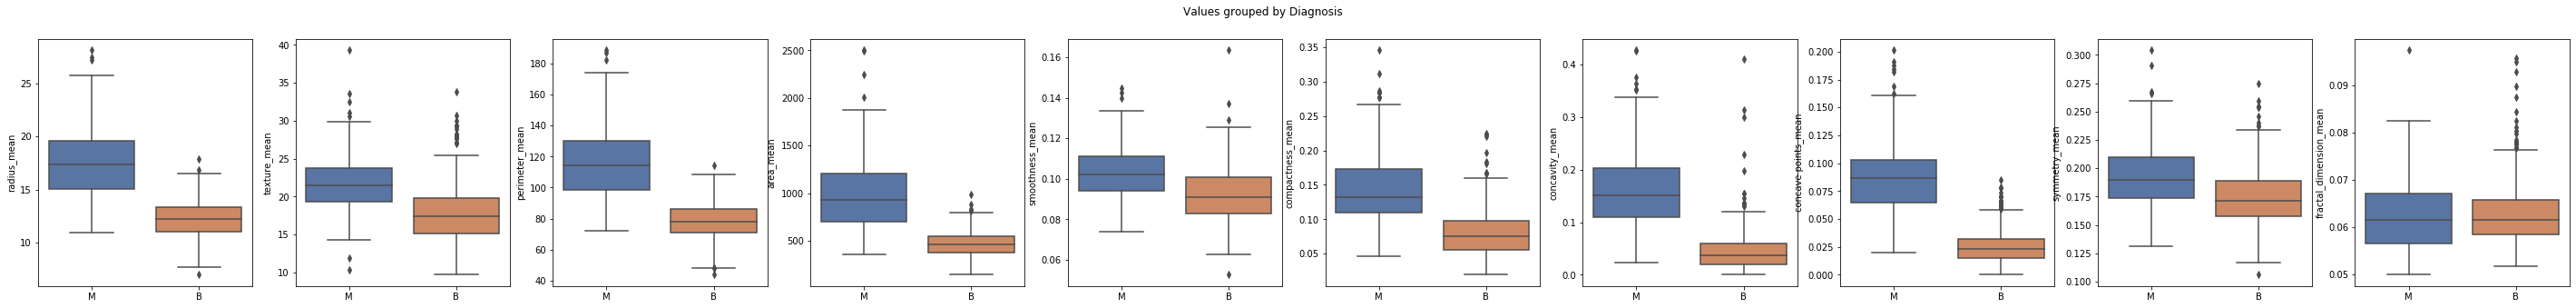

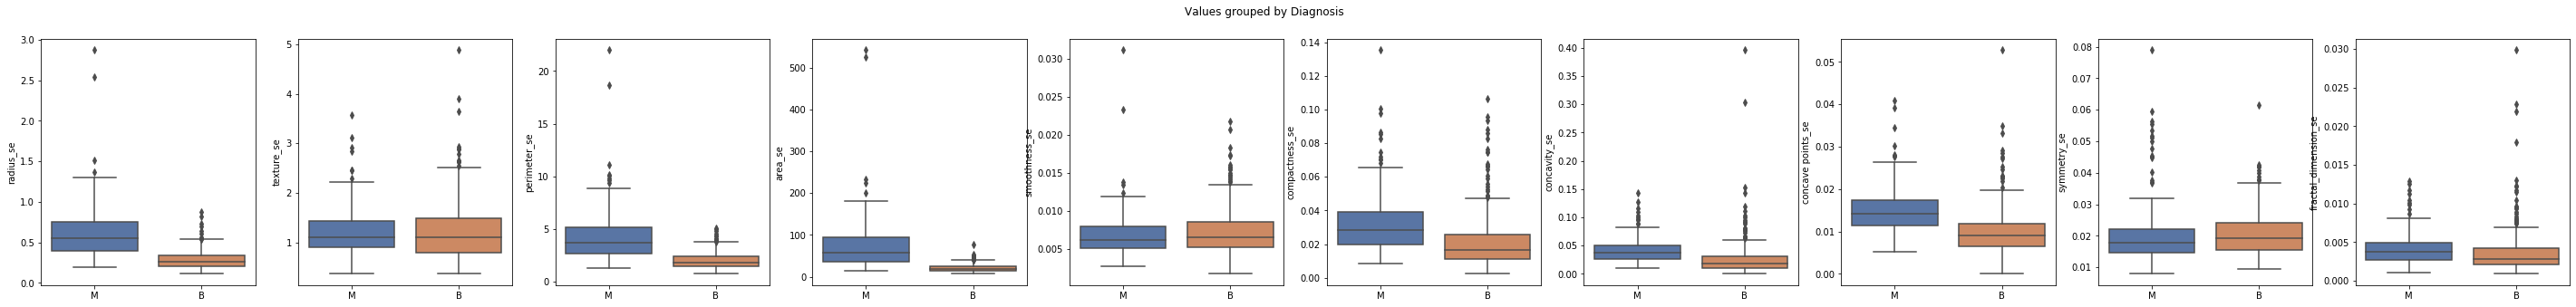

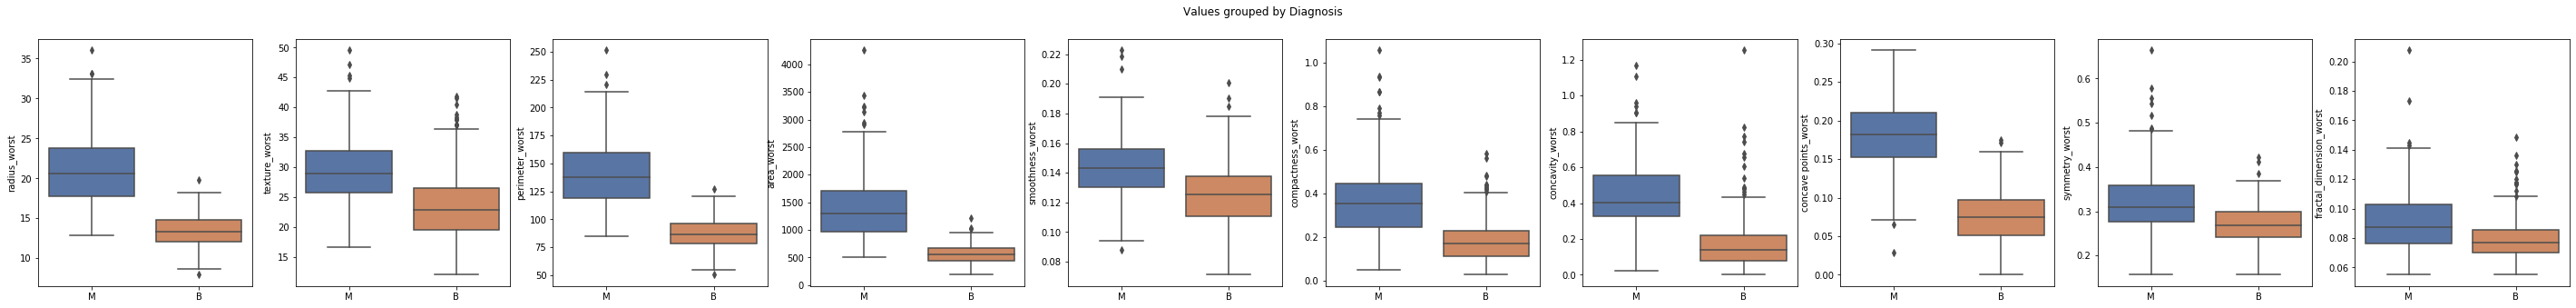

In [11]:
def boxplot_features(features_list):
    f,axis = plt.subplots(1,10,figsize = (50,5))
    f.suptitle('Values grouped by Diagnosis')
    for i, feature in enumerate(features_list,1):
        boxplot = sns.boxplot(x='diagnosis', y=feature, data=df,ax=axis[i-1], palette='deep').set(xlabel='')

boxplot_features(features_mean)
boxplot_features(features_se)
boxplot_features(features_worst)

- seems like malignant tumours tend to have higher values for most features
- presence of redundancy and/or multicolinearity shown by
    - almost perfect linear correlation betwen radius (r) , perimeter (2πr) & area (πr^2) - not surprising as they are mathematically related
    - concavity & concave points
>> need to perform dimensionality reduction (PCA)

- other plots
    - scatter plots between individual features?
    - group mean & worst values together?
    - the original paper mentioned extreme values of area, smoothnes & texture 


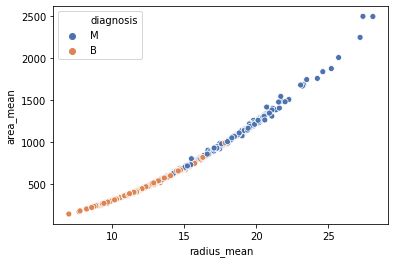

In [12]:
feature1 = 'radius_mean'
feature2 = 'area_mean'

sns.scatterplot(x=feature1, y=feature2, data=df, hue='diagnosis', palette='deep')

## Feature engineering & selection

In [13]:
# split data into X (features) & y (diagnosis) and convert y into binary
X = df.drop('diagnosis', axis = 1)

df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1
df['diagnosis'] = df['diagnosis'].astype(int)
y = df['diagnosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

### PCA

In [39]:
# Standardisation for PCA
scale = StandardScaler().fit(X_train) # fitting standardisation on the training set only

# apply standardisation to both training & test set
X_train_norm = scale.transform(X_train)
X_test_norm = scale.transform(X_test)

In [40]:
pca = PCA().fit(X_train_norm) # fitting an empty PCA on the training set only

Text(0.5, 0, 'number of PCs')

Text(0, 0.5, 'variance explained')

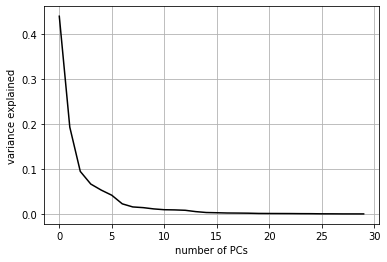

In [44]:
# To decide on the number of PCs - variance explained
var_explained = pca.explained_variance_ratio_
f = plt.plot(var_explained, color='black')
plt.xlabel('Number of PCs')
plt.ylabel('Variance explained')
plt.grid()

Text(0.5, 0, 'Number of PCs')

Text(0, 0.5, 'Cumulative variance explaind')

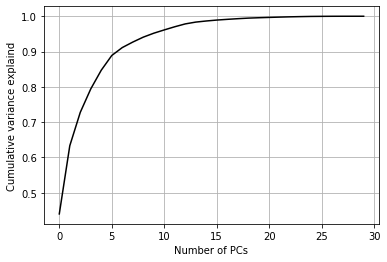

In [45]:
# To decide on the number of PCs - scree plot
var_cum = np.cumsum(var_explained)
f = plt.plot(var_cum, color='black')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative variance explaind')
plt.grid()

In [47]:
# indexing starts at 0
var_cum[9]

0.9519130302493666

In [48]:
# PCA with 10 components
pca = PCA(n_components=10).fit(X_train_norm)

# apply the mapping/transformation to both training & test set
X_train_PCA = pca.transform(X_train_norm)
X_test_PCA = pca.transform(X_test_norm)

## Modelling - classifier (categorical & supervised)
### 1.logistic regression 
    1.1) without PCA 
    1.2) with PCA


In [51]:
# Logistic regression
# 1.1) Base model - logistic regression with standardisation & without PCA
logit = LogisticRegression(random_state=3) 
logit.fit(X_train_norm, y_train_norm)

# Predict labels & probabilities on test set
pred_logit = logit.predict(X_test_norm) 
proba_logit = logit.predict_proba(X_test_norm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Feature importance')

Text(0.5, 1.0, 'Feature importance for logistic regression')

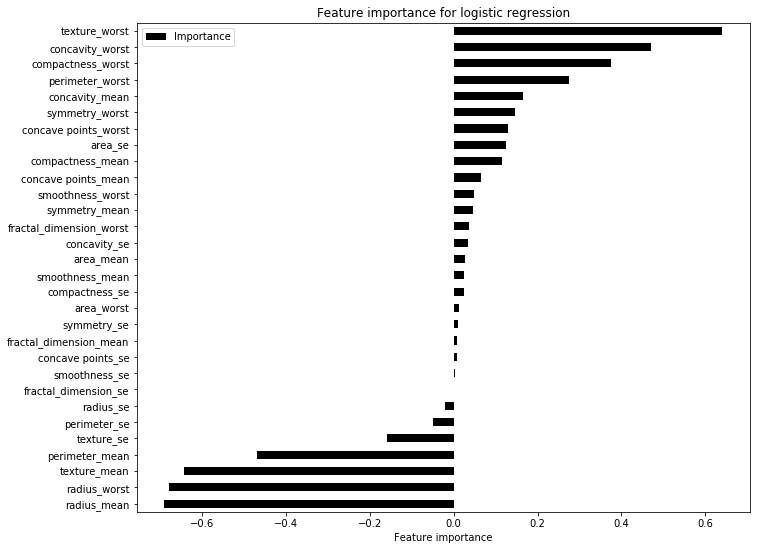

In [54]:
# 1.2) logistic regression with PCA
logit_PCA = LogisticRegression(random_state = 3)
logit_PCA.fit(X_train_PCA, y_train)

pred_logit_PCA = logit_PCA.predict(X_test_PCA) 
proba_logit_PCA = logit_PCA.predict_proba(X_test_PCA)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 2. decision tree
    - 2.1) decision tree
    - 2.2) random forest

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2.1) decision tree
dt_PCA = DecisionTreeClassifier(random_state=3)
dt_PCA.fit(X_train_PCA, y_train)
pred_dt_PCA = dt_PCA.predict(X_test_PCA)
proba_dt_PCA = dt_PCA.predict_proba(X_test_PCA)

# 2.2) random forest
rf_PCA = RandomForestClassifier(random_state = 3)
rf_PCA.fit(X_train_PCA, y_train)
pred_rf_PCA = rf_PCA.predict(X_test_PCA)
proba_rf_PCA = rf_PCA.predict_proba(X_test_PCA)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 3. SVC (Support Vector Classification)
- finds a hyperplane in an N-dimensional space that distinctly classifies the data points
- ie) for 2 classes: draws a straight line and labels all the data points that fall on one side of the line as one class, all the points that fall on the other side labeled as another class

In [64]:

svc_PCA = SVC(probability=True, random_state=3)
svc_PCA.fit(X_train_PCA, y_train)
pred_svc_PCA = svc_PCA.predict(X_test_PCA)
proba_svc_PCA = svc_PCA.predict_proba(X_test_PCA)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### 4. KNN (K-Nearest Neighbours)
- classifies based on proximity between data points

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn_PCA = KNeighborsClassifier() # using the default value of k = 5 for now
knn_PCA.fit(X_train_PCA, y_train)
pred_knn_PCA = knn_PCA.predict(X_test_PCA)
proba_knn_PCA = knn_PCA.predict_proba(X_test_PCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Model: logistic regression without PCA
Confusion matrix:
[[70  4]
 [ 6 34]]
Accuracy: 0.9122807017543859
AUC: 0.9743243243243243
Model: logistic regression with PCA
Confusion matrix:
[[73  1]
 [ 2 38]]
Accuracy: 0.9736842105263158
AUC: 0.9959459459459459
Model: decision tree with PCA
Confusion matrix:
[[70  4]
 [ 3 37]]
Accuracy: 0.9385964912280702
AUC: 0.935472972972973
Model: random forest with PCA
Confusion matrix:
[[72  2]
 [ 5 35]]
Accuracy: 0.9385964912280702
AUC: 0.9847972972972973
Model: SVC with PCA
Confusion matrix:
[[72  2]
 [ 2 38]]
Accuracy: 0.9649122807017544
AUC: 0.9945945945945946
Model: KNN with PCA
Confusion matrix:
[[73  1]
 [ 4 36]]
Accuracy: 0.956140350877193
AUC: 0.9957770270270271


In [117]:
predicted_prob = proba_logit, proba_logit_PCA, proba_dt_PCA, proba_rf_PCA, proba_svc_PCA, proba_knn_PCA

model_name = ["logistic regression without PCA", "logistic regression", "decision tree", "random forest", "SVC", "KNN"]

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC')

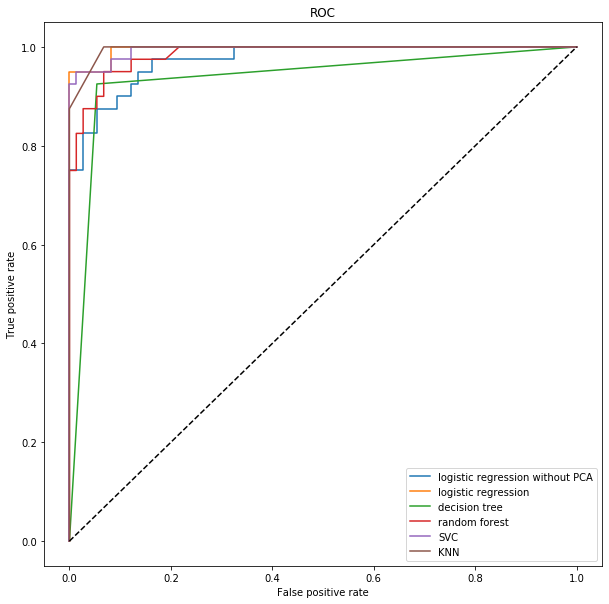

In [116]:
# plot ROC
fig = plt.figure(figsize=(10,10))
for i in range(6):
    fpr, tpr, thresholds = roc_curve(y_test,predicted_prob[i][:,1])
    plt.plot(fpr, tpr, label=model_name[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')

### at first glance
- PCA improves performance with logistic regression
- logistic regression (with PCA), SVC & KNN seem to be the best

## To do
- hyperparameter tuning
- cross-validation
- compare models with & without PCA?
- **for presentation**: write function to output model evaluation for better comparison

In [ ]:
def classification_model(model,model_name,X_train,y_train,X_test,y_test) 
   
    #Fit the model
    model.fit(X_train, y_train)

    # Make predictions on training set 
    predicted = model.predict(X_test)
    predicted_prob = model.proba(X_test)

    # Evaluate using confusion matrix, ROC curve and AUC
    cm = confusion_matrix(y_test, predicted)
    accuracy = accuracy_score(y_test, predicted)
    auc = roc_auc_score(y_test, predicted_prob[:,1])
    
    print("Model: " + model_name)
    print("Confusion matrix:")
    print(cm)
    # sns.heatmap(cm)
    print("Accuracy: %s" % "{0:.1%}".format(accuracy))
    print("AUC: %s" % "{0:.1%}".format(auc))

# feature importance
    if feature_importance = True:
        coefs = pd.Dataframe(model.coef_.reshape((30,1)), index=X_train.columns.tolist(),columns=['Importance'])
    coefs = coefs.sort_values(by='Importance', ascending=True)
    f = coefs.plot(kind='barh', figsize=(11,9), color = 'black')
    plt.xlabel('Feature importance')

    model_name
    return cm, accuracy, auc
    

In [ ]:
logit = LogisticRegression(random_state=3) 


In [ ]:
def Classification_model_randomisedCV(model,param_grid,data_X,data_y):
    
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=3, n_jobs = -1)
    
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)




        kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))